In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import make_moons

import random

random.seed(666)


X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [4]:
# X.shape, y.shape ## ((50, 2), (50,))
# type(X)

<AxesSubplot:xlabel='x1', ylabel='x2'>

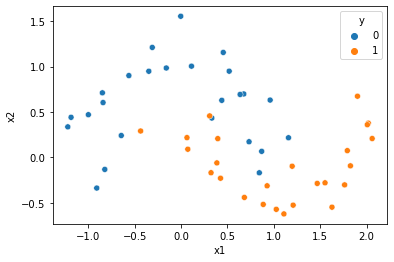

In [5]:
df = pd.DataFrame(data = X, columns = ["x1", "x2"])
df["y"] = y
sns.scatterplot(data=df, x="x1", y="x2", hue="y")

In [6]:
X = np.hstack([X, np.ones((X.shape[0], 1))])
X

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

In [7]:
def sigmoid(matrix):
    output = 1/(1 + np.exp(-matrix))
    return output

In [8]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

In [9]:
#seed(666)
weights_1 = np.random.rand(3,2)
weights_2 = np.random.rand(3,1)

In [10]:
weights_1.shape

(3, 2)

In [11]:
def feed_forward(X, weights):
    """ 1. Multiply the input matrix X with the weights of the first layer. """
    multiplication_result = np.dot(X, weights_1)
    """ 2. Apply the sigmoid function on the result. """
    first_sigmoid_results = sigmoid(multiplication_result)
    """ 3. Append an extra column of ones to the result (i.e. the bias). """
    append_results = np.hstack([first_sigmoid_results, np.ones((first_sigmoid_results.shape[0], 1))])
    """ 4. Multiply the output of the previous step with the weights of the second (i.e. outer) layer. """
    second_multiplication_result = np.dot(append_results, weights_2)
    """ 5. Apply the sigmoid function on the result. """
    second_sigmoid_results = sigmoid(second_multiplication_result)
    """ 6. Return all intermediate results (i.e. anything that is outputted by an activation function). """
    return first_sigmoid_results, second_sigmoid_results
    """
    1. Multiply the input matrix X
       with the weights of the first layer.
       
    2. Apply the sigmoid function on the result.

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Multiply the output of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """

    #return output1, output2

In [1]:
out1, out2 = feed_forward(X, [weights_1, weights_2])
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

Xref = np.array([[1.0, 2.0, 1.0]])
whidden = np.array([[1.0, 2.0, 0.0],
                 [-1.0, -2.0, 0.0]
                    ]).T
wout = np.array([[1.0, -1.0, 0.5]]).T

out1, out2 = feed_forward(Xref, [whidden, wout])
assert np.all(out1.round(2) == np.array([[0.99, 0.01]]))
assert np.all(out2.round(2) == np.array([[0.82]]))

NameError: name 'feed_forward' is not defined